In [2]:
import pandas as pd
import numpy as np
training_data=pd.read_csv("train.csv")
Y=training_data["SalePrice"]
del training_data["SalePrice"]
X=training_data
X.shape

(1168, 10)

In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[ 0.65669017,  0.56985198, -1.04528346, ...,  0.92852386,
        -1.51571947, -1.67745507],
       [ 0.65669017,  0.23765885, -1.04528346, ...,  0.29725735,
        -0.98871868, -1.67745507],
       [-0.81127943, -0.3923626 ,  0.30376746, ..., -0.33400916,
        -1.38396928,  0.78721474],
       ...,
       [-0.81127943, -1.39848776, -1.04528346, ..., -0.96527568,
        -0.75815584, -1.67745507],
       [-0.07729463,  0.26629619, -1.04528346, ...,  0.92852386,
        -0.52759299,  0.54558045],
       [ 0.65669017, -0.15180895,  0.30376746, ..., -0.96527568,
         0.62522124,  0.25561929]])

In [4]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)

In [5]:
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [6]:
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [7]:
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [55]:
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2500
    n = len(x)
    linear_loss=[]
    learning_rate = 0.005

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:],)
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    

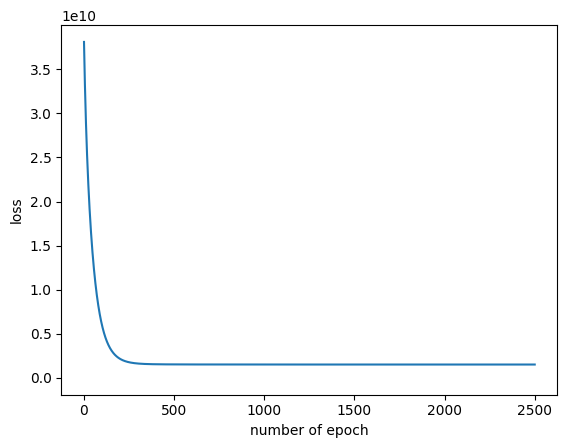

In [56]:
import matplotlib.pyplot as plt
w,b=gradient_descent(X_transform,Y)

In [36]:
print("weight:",w)
print("bias:",b)

weight: [26948.33208938 25416.38857725  8302.23977535  3740.59068296
  7259.86213855  6211.40277388 -3201.80926999   968.63545868
  7506.51551492  6087.17769114]
bias: 181223.59160736983


In [37]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)


In [38]:
y_pred=predict(X_transform)
y_pred

array([176315.37560615, 166010.29578034, 143515.49145305, ...,
        87275.50312721, 185979.92818386, 211202.01144039])

In [39]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,184000,176315.4
1,164000,166010.3
2,130000,143515.5
3,555000,386796.8
4,176000,197838.2
...,...,...
1163,149500,163730.6
1164,160000,185760.5
1165,115000,87275.5
1166,165500,185979.9


In [40]:
test_data=pd.read_csv('test.csv')
n=test_data["SalePrice"]
del test_data["SalePrice"]
m=test_data
M_transform=sc.fit_transform(m)
M_transform

array([[ 1.31834832,  0.9022699 ,  1.64321655, ...,  0.85919977,
         1.14386966,  1.00514251],
       [-0.05160794,  0.26525808, -0.9574297 , ..., -0.26585105,
        -0.483793  ,  0.12316771],
       [ 0.63337019, -0.50556391,  0.34289343, ..., -1.39090187,
         1.10996002,  0.95614391],
       ...,
       [-0.05160794, -1.21230779,  0.34289343, ..., -1.39090187,
         1.04214074,  0.85814671],
       [ 0.63337019, -0.42452394,  0.34289343, ..., -0.26585105,
         1.1777793 ,  1.0541411 ],
       [-0.05160794, -0.01367017,  0.34289343, ...,  0.85919977,
         1.10996002,  1.0541411 ]])

In [41]:
a=np.dot(M_transform,w)
n_pred=a+b
n_pred



array([271315.98408329, 181910.53712162, 180556.84532124, 181232.27252101,
        80144.15583618, 108376.36153282, 117627.55898752, 190173.59478596,
       212314.74592563, 162284.19528972, 218878.3564074 , 121474.21594168,
       176705.2408331 , 143831.75117238, 285229.13786701, 168840.23859731,
       206760.19344378, 230835.83561639, 150566.78811608, 157234.45769211,
       236405.56264153, 268802.23784924, 198195.37115518, 128356.57625318,
       243727.71438767, 148555.86210529, 213546.55475528,  93687.2238083 ,
       141923.12427497, 171374.58433249, 281452.92441572, 184699.0661614 ,
       179711.36369783, 133358.02984883, 151059.33944148, 146453.80517056,
        16539.49868604, 244990.65687197, 358185.96909886, 184582.77455462,
       137376.8897408 , 107665.39786667,  67316.44597159,  65194.3653869 ,
       154300.98413532, 165652.38369417,  88289.20161299, 235167.91615413,
       110070.3305567 , 165258.84023381, 127175.57421035, 231763.50729446,
       255028.49335825, 2

In [42]:
df_preds=pd.DataFrame()
df_preds["n_actual"]=n
df_preds["n_predicted"]=np.round(n_pred,1)
df_preds

,n_actual,n_predicted
0,281000,271316.0
1,139000,181910.5
2,147400,180556.8
3,153500,181232.3
4,86000,80144.2
...,...,...
287,158000,186351.4
288,118000,131894.6
289,140000,157226.5
290,159895,207111.0


In [44]:
from sklearn.metrics import r2_score
score = r2_score(df_preds["n_actual"], df_preds["n_predicted"])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 82.0%


In [57]:
accuracy=format(round(score, 2) *100)
accuracy

'82.0'